# Slay the Spire Run Outcome Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
from pathlib import Path
from glob import glob
import warnings

In [3]:
plt.style.use("seaborn-v0_8")

## All Links in Document

## Introduction

## Data Merging

In [ ]:
files_raw = glob("data/raw/*.json")

In [ ]:
len(files_raw)

In [ ]:
q1 = files_raw[:400]
q2 = files_raw[400:800]
q3 = files_raw[800:1200]
q4 = files_raw[1200:]

file_quarters_dict = {"q1": q1, "q2": q2, "q3": q3, "q4": q4}

In [ ]:
Path(f"asdf")

In [ ]:
def merge_json(out_name, file_list):
    result = []
    for i, file in enumerate(file_list):
        print(f"Quarter: {out_name} | File: {i+1}/{len(file_list)}", end="\r")
        with open(file, 'r') as f:
            result.extend(json.load(f))

    with open(Path(f'data/combined/merged_{out_name}.json'), 'w') as output_file:
        json.dump(result, output_file, indent="")

In [ ]:
for key, value in file_quarters_dict.items():
    merge_json(key, value)

In [ ]:
files_json = glob("data/combined/*.json")

In [ ]:
files_json

In [ ]:
files_json_dict = {"q1": files_json[0], "q2": files_json[1], "q3": files_json[2], "q4": files_json[3]}
files_json_dict

In [ ]:
def json_to_csv(out_name, json_file_paths):
    with open(f"{json_file_paths}", "r") as f:
        raw = json.loads(f.read())
        df = pd.json_normalize(raw)
        df.to_csv(f"data/combined/csv_{out_name}.csv", index=False)

In [ ]:
for key, value in files_json_dict.items():
    json_to_csv(key, value)

In [ ]:
def merge_csv():
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore')
        files_csv = glob("data/combined/*.csv")
        df = pd.concat(map(pd.read_csv, files_csv), ignore_index=True)
        df.to_csv("data/full/full.csv", index=False)

In [ ]:
merge_csv()

## Data Preparation

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore')
    df = pd.read_csv("data/full/full.csv")

In [5]:
df.columns = df.columns.str.replace("event\.", "", regex=True)

In [6]:
pd.options.display.max_columns = 60
df.head(3)

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[114, 127, 127, 127, 145, 177, 177, 193, 193, ...",50,3610,"['Strike_R', 'Strike_R', 'Defend_R', 'Defend_R']",531,251eb1e0-5bfe-4c74-a86d-2925b198cd9c,20201101005734,False,"[{'data': 'Anger', 'floor': 7, 'key': 'SMITH'}...",TEN_PERCENT_HP_LOSS,18759847683600,0.0,"['Strike_R+1', 'Strike_R+1', 'Defend_R', 'Defe...","['Burning Blood', 'Ancient Tea Set', 'Ginger',...","[10, 16, 22, 50]","[{'damage': 0, 'enemies': 'Cultist', 'floor': ...",4360709066122049819,"[{'floor': 1, 'key': 'BlessingOfTheForge'}, {'...",False,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",IRONCLAD,"['Demon Form', 'Whirlwind+1', 'Clash+1']",2,"[12, 24, 30]","[72, 72, 72, 72, 69, 49, 49, 52, 52, 42, 48, 4...",161,THREE_RARE_CARDS,False,False,False,9,0.0,1604188654,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",2020-07-30,4,False,"[72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 7...","[{'not_picked': ['Fiend Fire', 'Corruption'], ...",3232,"[{'floor': 6, 'key': 'Ginger'}, {'floor': 9, '...","[{'damage_healed': 0, 'gold_gain': 0, 'player_...",False,"[{'not_picked': ['Fusion Hammer', 'Black Star'...","[12, 24, 30, 39]",False,"[1, 5, 8, 18, 19, 38]",Awakened One,0,NaN
1,"[118, 135, 145, 145, 165, 165, 240, 240, 264, ...",17,468,['Undo'],157,5366608f-19e5-48d5-85d6-3dd822d4bcb0,20201031195733,False,"[{'data': 'Defragment', 'floor': 6, 'key': 'SM...",NONE,282011203681164,0.0,"['Zap+1', 'Dualcast', 'Ball Lightning+1', 'Cha...","[""Pandora's Box"", 'Akabeko', 'Whetstone', 'Pot...",[],"[{'damage': 0, 'enemies': 'Cultist', 'floor': ...",-5287898441915956518,"[{'floor': 1, 'key': 'GamblersBrew'}, {'floor'...",False,"['M', 'M', 'M', '?', 'M', 'R', '?', 'R', 'T', ...",DEFECT,['Whetstone'],0,[11],"[75, 70, 64, 64, 64, 64, 53, 53, 53, 53, 53, 7...",150,BOSS_RELIC,False,False,False,3,0.0,1604188653,"['M', '?', 'M', '?', '?', 'R', '?', 'R', 'T', ...",2020-07-30,1,False,"[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7...","[{'not_picked': ['Sweeping Beam', 'Cold Snap']...",727972,"[{'floor': 9, 'key': 'Akabeko'}, {'floor': 14,...","[{'damage_healed': 0, 'gold_gain': 0, 'cards_t...",False,[],[11],False,"[1, 5, 14]",NaN,0,NaN
2,"[99, 99]",0,19,[],0,c393b168-681a-461b-ab36-14b12e65789f,20201101005730,False,[],NONE,830089272981400,0.0,"['Strike_P', 'Strike_P', 'Strike_P', 'Strike_P...","['PureWater', 'NeowsBlessing']",[],[],-7133015978471924421,[],False,[],WATCHER,[],0,[],"[72, 72]",99,THREE_ENEMY_KILL,False,False,False,0,0.0,1604188650,[],2020-07-30,0,False,"[72, 72]",[],257529,[],[],False,[],[],False,[],NaN,0,NaN


In [7]:
print(df[df["is_trial"] != False].shape[0])
print(df[df["circlet_count"] > 0].shape[0])
print(df[df["is_prod"] != False].shape[0])
print(df[df["is_daily"] != False].shape[0])
print(df[df["chose_seed"] != False].shape[0])
print(df[df["is_beta"] != False].shape[0])
print(df[df["is_endless"] != False].shape[0])

0
545
0
0
0
105130
0


In [8]:
df = df.drop(columns=['playtime', 'items_purged', 'score', 'play_id', 'local_time',
                      'is_ascension_mode', 'campfire_choices', 'seed_source_timestamp',
                      'circlet_count', 'damage_taken', 'seed_played', 'potions_obtained', 'is_trial', 
                      'path_per_floor', 'items_purchased', 'item_purchase_floors',
                      'current_hp_per_floor', 'gold', 'is_prod', 'is_daily', 
                      'chose_seed', 'win_rate', 'timestamp', 'build_version', 
                      'max_hp_per_floor', 'card_choices', 'player_experience', 
                      'relics_obtained', 'event_choices', 'is_beta', 'boss_relics', 
                      'items_purged_floors', 'is_endless', 'potions_floor_spawned', 
                      'special_seed', 'neow_bonus', 'neow_cost'])

In [9]:
df.rename({"gold_per_floor": "total_gold_spent", "master_deck": "final_deck_size",
           "potions_floor_usage": "potions_used", "path_taken": "elites_killed"}, axis="columns", inplace=True)

In [10]:
df.head(3)

,total_gold_spent,floor_reached,final_deck_size,relics,potions_used,character_chosen,campfire_rested,campfire_upgraded,elites_killed,purchased_purges,victory,killed_by,ascension_level
0,"[114, 127, 127, 127, 145, 177, 177, 193, 193, ...",50,"['Strike_R+1', 'Strike_R+1', 'Defend_R', 'Defe...","['Burning Blood', 'Ancient Tea Set', 'Ginger',...","[10, 16, 22, 50]",IRONCLAD,2,9,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",4,False,Awakened One,0
1,"[118, 135, 145, 145, 165, 165, 240, 240, 264, ...",17,"['Zap+1', 'Dualcast', 'Ball Lightning+1', 'Cha...","[""Pandora's Box"", 'Akabeko', 'Whetstone', 'Pot...",[],DEFECT,0,3,"['M', '?', 'M', '?', '?', 'R', '?', 'R', 'T', ...",1,False,NaN,0
2,"[99, 99]",0,"['Strike_P', 'Strike_P', 'Strike_P', 'Strike_P...","['PureWater', 'NeowsBlessing']",[],WATCHER,0,0,[],0,False,NaN,0


In [11]:
df.isna().sum()

total_gold_spent          0
floor_reached             0
final_deck_size           0
relics                    0
potions_used              0
character_chosen          1
campfire_rested           0
campfire_upgraded         0
elites_killed             0
purchased_purges          0
victory                   0
killed_by            440376
ascension_level           0
dtype: int64

In [12]:
df = df[df["floor_reached"].isin([0, 1, 2, 3]) == False]

In [13]:
df = df.loc[df["floor_reached"] <= 55]

In [14]:
df = df.loc[df["ascension_level"].isin([*range(0, 21)])]

In [15]:
df = df[df["total_gold_spent"] != "[]"]

In [16]:
df = df[df["purchased_purges"] <= 8]

In [17]:
df.loc[(df["victory"] == True) & (df["killed_by"].isna()), "killed_by"] = "None"

In [18]:
df["killed_by"].fillna("Misc", inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
df.isna().sum()

total_gold_spent     0
floor_reached        0
final_deck_size      0
relics               0
potions_used         0
character_chosen     0
campfire_rested      0
campfire_upgraded    0
elites_killed        0
purchased_purges     0
victory              0
killed_by            0
ascension_level      0
dtype: int64

In [22]:
def calculate_gold_spent(gpr):
    gold_per_run = []
    for run in gpr:
        list_of_strings = run.strip("][").split(", ")
        list_of_ints = [eval(i) for i in list_of_strings]

        gold = 0
        for i, value in enumerate(list_of_ints[1:]):
            if value < list_of_ints[i]:
                gold += (list_of_ints[i] - value)

        gold_per_run.append(gold)
        
    return gold_per_run

In [23]:
total_gold_spent_per_run = calculate_gold_spent(df.loc[:, "total_gold_spent"])

In [24]:
len(total_gold_spent_per_run), df.shape[0]

(1782026, 1782026)

In [25]:
df["total_gold_spent"] = total_gold_spent_per_run

In [26]:
df["total_gold_spent"].max()

2043515810

In [27]:
df["total_gold_spent"].describe()

count    1.782026e+06
mean     2.119130e+03
std      1.705916e+06
min      0.000000e+00
25%      8.100000e+01
50%      2.840000e+02
75%      5.160000e+02
max      2.043516e+09
Name: total_gold_spent, dtype: float64

In [28]:
df.loc[df["total_gold_spent"] > 2000].shape[0]

2751

In [29]:
df = df.loc[df["total_gold_spent"] < 2000]

In [30]:
df.head(3)

,total_gold_spent,floor_reached,final_deck_size,relics,potions_used,character_chosen,campfire_rested,campfire_upgraded,elites_killed,purchased_purges,victory,killed_by,ascension_level
0,689,50,"['Strike_R+1', 'Strike_R+1', 'Defend_R', 'Defe...","['Burning Blood', 'Ancient Tea Set', 'Ginger',...","[10, 16, 22, 50]",IRONCLAD,2,9,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",4,False,Awakened One,0
1,265,17,"['Zap+1', 'Dualcast', 'Ball Lightning+1', 'Cha...","[""Pandora's Box"", 'Akabeko', 'Whetstone', 'Pot...",[],DEFECT,0,3,"['M', '?', 'M', '?', '?', 'R', '?', 'R', 'T', ...",1,False,Misc,0
2,1054,51,"['AscendersBane', 'Strike_G+1', 'Strike_G', 'D...","['Ring of the Snake', 'Meat on the Bone', 'Anc...","[10, 23, 23, 28, 42, 47, 50, 50]",THE_SILENT,2,3,"['M', 'M', 'M', 'M', '$', 'E', '?', 'E', 'T', ...",2,True,None,13


In [31]:
def calculate_deck_size(dspr):
    deck_sizes = []
    for deck in dspr:
        list_of_strings = deck.strip("][").split(", ")
        deck_sizes.append(len(list_of_strings))
        
    return deck_sizes

In [32]:
deck_size_per_run = calculate_deck_size(df.loc[:, "final_deck_size"])

In [33]:
len(deck_size_per_run), df.shape[0]

(1779271, 1779271)

In [34]:
df["final_deck_size"] = deck_size_per_run

In [35]:
df["final_deck_size"].max()

183

In [36]:
df["final_deck_size"].describe()

count    1.779271e+06
mean     2.128707e+01
std      7.459112e+00
min      1.000000e+00
25%      1.600000e+01
50%      2.000000e+01
75%      2.500000e+01
max      1.830000e+02
Name: final_deck_size, dtype: float64

In [37]:
df[df["final_deck_size"] > 55].shape[0]

543

In [38]:
df = df.loc[df["final_deck_size"] <= 55]

In [39]:
df.head(3)

,total_gold_spent,floor_reached,final_deck_size,relics,potions_used,character_chosen,campfire_rested,campfire_upgraded,elites_killed,purchased_purges,victory,killed_by,ascension_level
0,689,50,25,"['Burning Blood', 'Ancient Tea Set', 'Ginger',...","[10, 16, 22, 50]",IRONCLAD,2,9,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",4,False,Awakened One,0
1,265,17,15,"[""Pandora's Box"", 'Akabeko', 'Whetstone', 'Pot...",[],DEFECT,0,3,"['M', '?', 'M', '?', '?', 'R', '?', 'R', 'T', ...",1,False,Misc,0
2,1054,51,34,"['Ring of the Snake', 'Meat on the Bone', 'Anc...","[10, 23, 23, 28, 42, 47, 50, 50]",THE_SILENT,2,3,"['M', 'M', 'M', 'M', '$', 'E', '?', 'E', 'T', ...",2,True,None,13


In [40]:
def calculate_relic_frequency(lists):
    result = {}
    for i, lst in enumerate(lists):
        list_of_strings = lst.strip("][").replace("\"", "").replace("\'", "").split(", ")
        for relic in list_of_strings:
            result.setdefault(relic, set()).add(i)
    
    final = {}
    for i, count in result.items():
        final[i] = {"Frequency": len(count), "Occurs": list(count)}
        
    return final

In [41]:
total_relic_frequency = calculate_relic_frequency(df.loc[:, "relics"])

In [42]:
len(total_relic_frequency)

180

In [43]:
def calculate_relic_count(rcpr):
    relic_counts = []
    for relics in rcpr:
        list_of_strings = relics.strip("][").split(", ")
        relic_counts.append(len(list_of_strings))
        
    return relic_counts

In [44]:
relic_count_per_run = calculate_relic_count(df.loc[:, "relics"])

In [45]:
len(relic_count_per_run), df.shape[0]

(1778728, 1778728)

In [46]:
df["relics"] = relic_count_per_run

In [47]:
df["relics"].max()

177

In [48]:
df["relics"].describe()

count    1.778728e+06
mean     8.423389e+00
std      5.425349e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      1.770000e+02
Name: relics, dtype: float64

In [49]:
df[df["relics"] > 30].shape[0]

1628

In [50]:
df = df.loc[df["relics"] <= 30]

In [51]:
df.head(3)

,total_gold_spent,floor_reached,final_deck_size,relics,potions_used,character_chosen,campfire_rested,campfire_upgraded,elites_killed,purchased_purges,victory,killed_by,ascension_level
0,689,50,25,15,"[10, 16, 22, 50]",IRONCLAD,2,9,"['M', 'M', '?', '?', 'M', 'E', 'R', 'M', 'T', ...",4,False,Awakened One,0
1,265,17,15,4,[],DEFECT,0,3,"['M', '?', 'M', '?', '?', 'R', '?', 'R', 'T', ...",1,False,Misc,0
2,1054,51,34,20,"[10, 23, 23, 28, 42, 47, 50, 50]",THE_SILENT,2,3,"['M', 'M', 'M', 'M', '$', 'E', '?', 'E', 'T', ...",2,True,None,13


In [52]:
def calculate_potions_used(pupr):
    potion_counts = []
    for potions in pupr:
        list_of_strings = potions.strip("][").split(", ")
        try:
            list_of_ints = [eval(i) for i in list_of_strings]
            potion_counts.append(len(list_of_ints))
        except:
            potion_counts.append(0)
        
    return potion_counts

In [53]:
potions_used_per_run = calculate_potions_used(df.loc[:, "potions_used"])

In [54]:
len(potions_used_per_run), df.shape[0]

(1777100, 1777100)

In [55]:
df["potions_used"] = potions_used_per_run

In [56]:
df["potions_used"].max()

102

In [57]:
df["potions_used"].describe()

count    1.777100e+06
mean     3.456106e+00
std      3.652226e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      1.020000e+02
Name: potions_used, dtype: float64

In [58]:
def calculate_elite_fights(efpr):
    elite_counts = []
    for elite in efpr:
        elite_counts.append(elite.count("E"))
        
    return elite_counts

In [59]:
elite_fights_per_run = calculate_elite_fights(df.loc[:, "elites_killed"])

In [60]:
len(elite_fights_per_run), df.shape[0]

(1777100, 1777100)

In [61]:
df["elites_killed"] = elite_fights_per_run

In [62]:
df["elites_killed"].max()

14

In [63]:
df["elites_killed"].describe()

count    1.777100e+06
mean     2.525753e+00
std      1.893028e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.400000e+01
Name: elites_killed, dtype: float64

In [64]:
df.reset_index(inplace=True, drop=True)

In [65]:
df.to_csv("data/full/full_prepared.csv", index=False)

# Data Understanding

Before exploring any data, it's first important to explain the <span style="color:#D0221a;">Ascension</span> mechanic within Slay the Spire. After successfully besting the final boss of a run, it's possible to toggle <span style="color:#D0221a;">Ascension</span>, which provides additional challenge during subsequent runs. Each time a level is beaten, the next <span style="color:#D0221a;">Ascension</span> level is unlocked. There are twenty difficulty levels in total with each level adding additional challenge in different ways. The <span style="color:#D0221a;">Ascension</span> modifiers, in order, are:

- <span style="color:#D0221a;">Ascension 1</span>: Elites spawn 60% more often
- <span style="color:#D0221a;">Ascension 2</span>: Normal enemies deal more damage with their attacks
- <span style="color:#D0221a;">Ascension 3</span>: Elites deal more damage with their attacks
- <span style="color:#D0221a;">Ascension 4</span>: Bosses deal more damage with their attacks
- <span style="color:#D0221a;">Ascension 5</span>: Heal for 75% of your HP after boss battles instead of 100%
- <span style="color:#D0221a;">Ascension 6</span>: Lose 10% of your health at the start of each run
- <span style="color:#D0221a;">Ascension 7</span>: Normal enemies have more HP and some gain higher block
- <span style="color:#D0221a;">Ascension 8</span>: Elites have more HP
- <span style="color:#D0221a;">Ascension 9</span>: Bosses have more HP and some gain higher block
- <span style="color:#D0221a;">Ascension 10</span>: Obtain 1 Ascender's Bane at the start of each run
- <span style="color:#D0221a;">Ascension 11</span>: Start each run with 1 less potion slot
- <span style="color:#D0221a;">Ascension 12</span>: Upgraded cards are 50% less likely to appear in act 2 and act 3
- <span style="color:#D0221a;">Ascension 13</span>: Bosses drop 25% less gold
- <span style="color:#D0221a;">Ascension 14</span>: Lower your maximum HP (-5 for Ironclad, 4 for the other classes)
- <span style="color:#D0221a;">Ascension 15</span>: Events have less positive outcomes and more severe consequences
- <span style="color:#D0221a;">Ascension 16</span>: Everything in shops costs 10% more
- <span style="color:#D0221a;">Ascension 17</span>: Normal enemies have more challenging movesets and abilities
- <span style="color:#D0221a;">Ascension 18</span>: Elites have more challenging movesets and abilities
- <span style="color:#D0221a;">Ascension 19</span>: Bosses have more challenging movesets and abilities
- <span style="color:#D0221a;">Ascension 20</span>: You fight two bosses in a row at the end of act 3

As the modifiers stack up, nearly every aspect of the game becomes more difficult and nearly every avenue of player strength is crippled in some way. There is a vast difference in difficulty between the base game and <span style="color:#D0221a;">Ascension 20</span>, and for that reason, <span style="color:#D0221a;">Ascension 20</span> will receive additional inspection at all times.

In [66]:
df = pd.read_csv("data/full/full_prepared.csv")
df.head()

,total_gold_spent,floor_reached,final_deck_size,relics,potions_used,character_chosen,campfire_rested,campfire_upgraded,elites_killed,purchased_purges,victory,killed_by,ascension_level
0,689,50,25,15,4,IRONCLAD,2,9,5,4,False,Awakened One,0
1,265,17,15,4,0,DEFECT,0,3,1,1,False,Misc,0
2,1054,51,34,20,8,THE_SILENT,2,3,10,2,True,None,13
3,86,16,23,6,3,IRONCLAD,2,1,3,0,False,The Guardian,0
4,0,16,19,6,2,IRONCLAD,3,0,3,0,False,Hexaghost,2


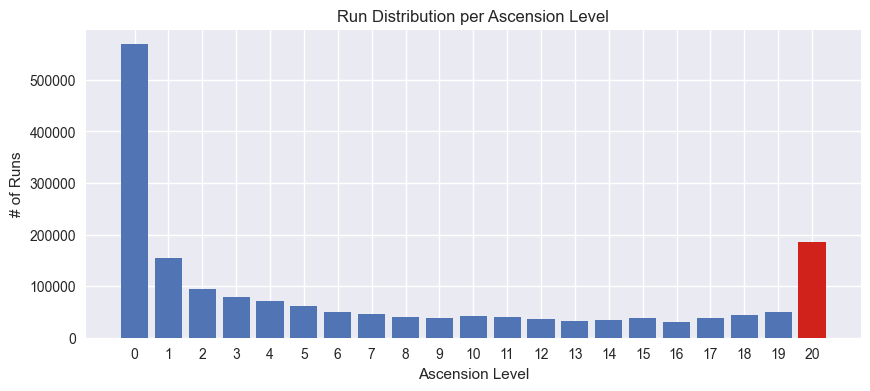

In [67]:
all_runs = df["ascension_level"].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.bar(all_runs.index, all_runs.values, color=["#5074b4" for i in range(len(all_runs)-1)] + ["#D0221a"])
plt.title("Run Distribution per Ascension Level")
plt.xlabel("Ascension Level")
plt.ylabel("# of Runs")
plt.xticks(np.arange(len(all_runs)))
plt.xticks(rotation=0)
plt.show()

This distribution of runs is interesting as the most runs happen in the base game and at <span style="color:#D0221a;">Ascension 20</span>. It's natural that the base game has the most runs as people slowly familiarize themselves with the game. In addition, some players may not enjoy the additional <span style="color:#D0221a;">Ascension</span> difficulty. For the more hardcore players that welcome the highest difficulty, there is little incentive to play the other <span style="color:#D0221a;">Ascension</span> levels.

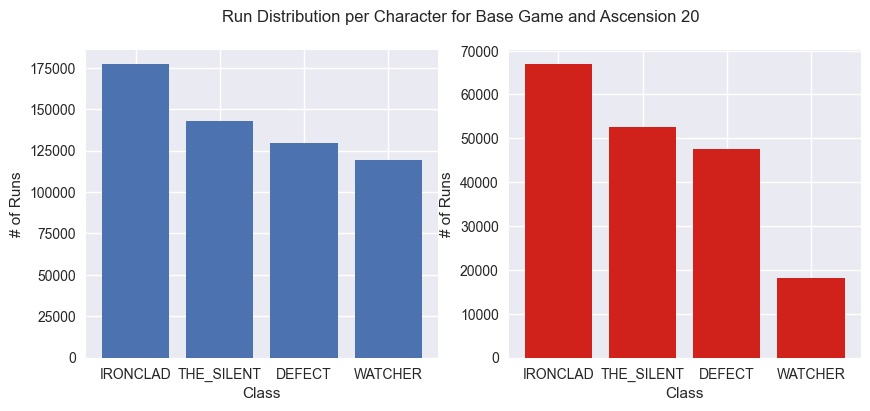

In [68]:
runs_a0 = df.loc[df["ascension_level"] == 0, "character_chosen"].value_counts()
runs_a20 = df.loc[df["ascension_level"] == 20, "character_chosen"].value_counts()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("Run Distribution per Character for Base Game and Ascension 20")
ax1.bar(runs_a0.index, runs_a0.values)
ax1.set_xlabel("Class")
ax1.set_ylabel("# of Runs")

ax2.bar(runs_a20.index, runs_a20.values, color="#D0221a")
ax2.set_xlabel("Class")
ax2.set_ylabel("# of Runs")
plt.show()

This distribution shows which characters are the most and least popular in Slay the Spire. There are several factors to consider here. The Ironclad is the only character initially available. Each other character, in order, is unlocked for play by completing a run with the previous character. Some people may not enjoy this type of game, making it likely that they'll play as the Ironclad or Silent once or twice, and quit before they get to try out the other characters. In addition, the Defect and Watcher are also more complex characters with additional mechanics. For players that enjoy simplicity, they may be less popular choices.

For these reasons, it's fair that the popularity of characters coincides with their unlock order. It's visible that the same order holds true at <span style="color:#D0221a;">Ascension 20</span>, with the Watcher seemingly being more unpopular as difficulty increases. Her innate difficulty of play, combined with <span style="color:#D0221a;">Ascension 20</span> may prove to be too much for many players to handle.

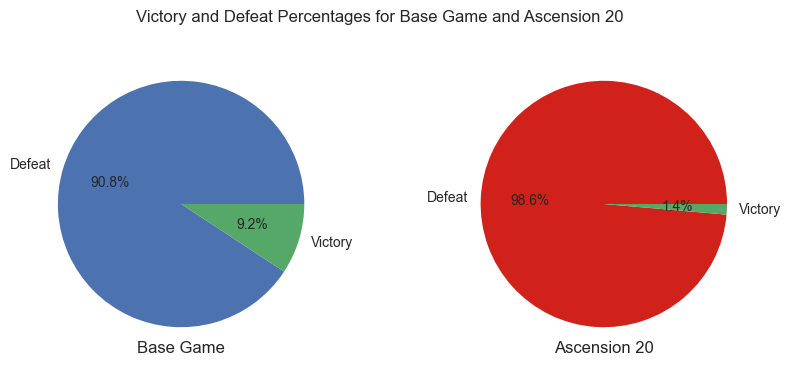

In [69]:
wins_a0 = df.loc[df["ascension_level"] == 0, "victory"].value_counts()
wins_a20 = df.loc[df["ascension_level"] == 20, "victory"].value_counts()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.suptitle("Victory and Defeat Percentages for Base Game and Ascension 20")
ax1.pie(wins_a0, labels=["Defeat", "Victory"], autopct="%.1f%%")
ax1.set_title("Base Game", y=-0.01)

ax2.pie(wins_a20, labels=["Defeat", "Victory"], autopct="%.1f%%", colors=["#D0221a", "#56a866"])
ax2.set_title("Ascension 20", y=-0.01)
plt.show()

It's visible that within the dataset, only 9.2% of all runs of the base game seem to end in victory. This is the case even after removing all runs that do not manage to reach floor 3. This was done to get rid of non-runs of people rerolling or quitting early due to being unhappy with a start. Naturally, these runs are largely comprised of new players.

As expected, the victory ratio at <span style="color:#D0221a;">Ascension 20</span> is very low. The game will require the utmost skill in general game knowledge, risk assessment, planning, etc., to achieve victory. In addition, with Slay the Spire being a roguelike deckbuilder, luck will always play a factor in your success.

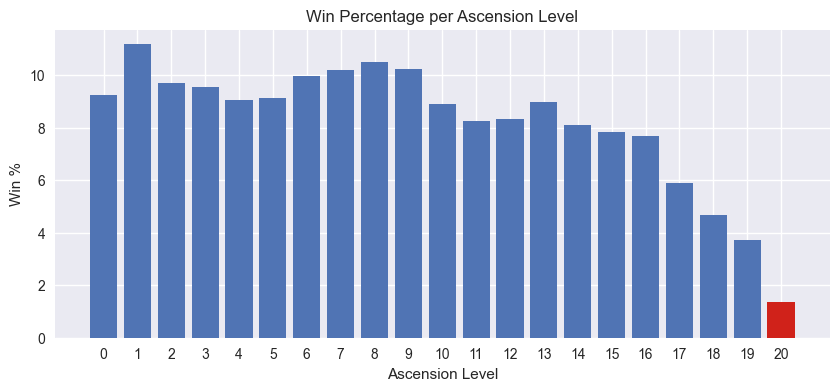

In [70]:
wpa = df[df["victory"]].groupby("ascension_level").size() / df["ascension_level"].value_counts().sort_index().values

plt.figure(figsize=(10,4))
plt.bar(wpa.index, wpa.values * 100, color=["#5074b4" for i in range(len(all_runs)-1)] + ["#D0221a"])
plt.title("Win Percentage per Ascension Level")
plt.xlabel("Ascension Level")
plt.ylabel("Win %")
plt.xticks(np.arange(len(all_runs)))
plt.xticks(rotation=0)
plt.show()

The above graph shows an interesting journey across the various <span style="color:#D0221a;">Ascension</span> levels. The earlier levels prove to not be too much of a hindrance, with <span style="color:#D0221a;">Ascension 1</span> even having a higher win rate than the base game. It's likely that on average, players taking on the additional difficulty levels, have become more acquainted with the game.

The win ratio starts to decline again at <span style="color:#D0221a;">Ascension 10</span>. This is where the more difficult modifiers are introduced, with <span style="color:#D0221a;">Ascension 10</span> introducing Ascender's Bane.

<img src="images/ascendersbane.png" width="200" align="left" />

Whereas the other modifiers have mainly affected the power or toughness of monsters, this modifier is unique in how it adds a card to your starter deck. It cannot be removed by any means and has no positive benefit either. Its purpose is to waste a draw and make your deck less consistent. At a higher difficulty where every card draw matters, this has the potential to be fatal in critical situations.

Deck consistency is a very important subject and is expanded upon more later.

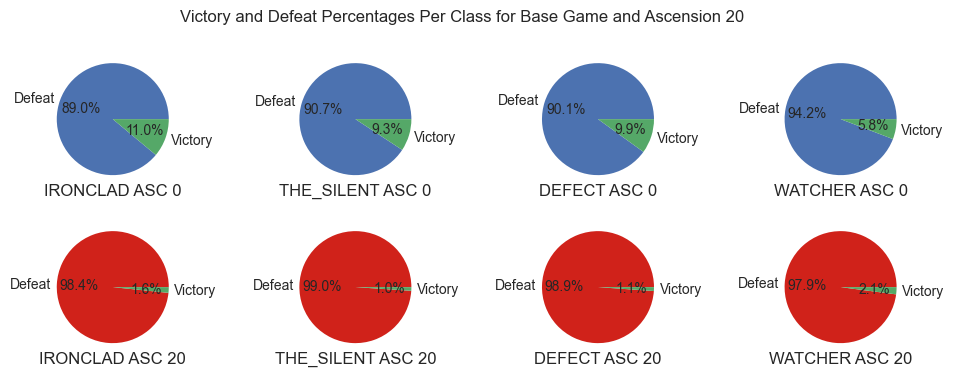

In [71]:
wpc = df.groupby(["character_chosen", "ascension_level", "victory"]).size().reset_index()

def add_plot(ax, character, asc, colors=["#D0221a", "#56a866"]):
    ax.pie(wpc.loc[(wpc["character_chosen"] == character) & (wpc["ascension_level"] == asc), 0], 
           labels=["Defeat", "Victory"], autopct="%.1f%%", colors=colors)
    ax.set_title(f"{character} ASC {asc}", y=-0.1)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 4))
fig.suptitle("Victory and Defeat Percentages Per Class for Base Game and Ascension 20")
add_plot(axes[0, 0], "IRONCLAD", 0, None)
add_plot(axes[0, 1], "THE_SILENT", 0, None)
add_plot(axes[0, 2], "DEFECT", 0, None)
add_plot(axes[0, 3], "WATCHER", 0, None)
add_plot(axes[1, 0], "IRONCLAD", 20)
add_plot(axes[1, 1], "THE_SILENT", 20)
add_plot(axes[1, 2], "DEFECT", 20)
add_plot(axes[1, 3], "WATCHER", 20)
plt.show()

The win ratio per class for the base game and <span style="color:#D0221a;">Ascension 20</span> paint an interesting picture. The Ironclad seems to perform the best for this difficulty. The Defect, while a mechanically more complex character and usually considered underpowered at times by the community, achieves second place.

Overall, the Watcher is characterized by being difficult, complex and high risk & high reward. In addition, she is the least popular character to play based on the previous findings. Despite all these factors, she boasts the highest win ratio on <span style="color:#D0221a;">Ascension 20</span>. Sometimes, certain characters or playstyles in games are incredibly powerful, but they have a very high barrier to entry. This makes most of the playerbase not bother with them, but the few people that are able to attain mastery will produce incredible results.

It's likely that the Watcher has few, but very faithful players that are able to draw out her maximum potential at <span style="color:#D0221a;">Ascension 20</span> to achieve these results.

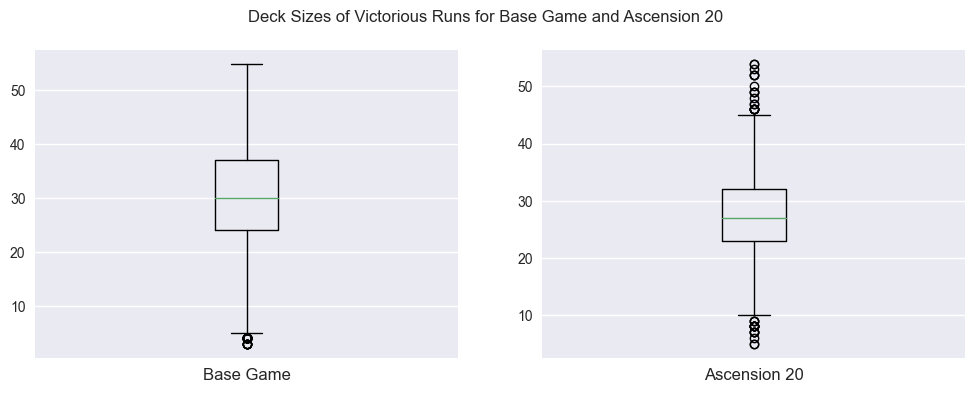

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle("Deck Sizes of Victorious Runs for Base Game and Ascension 20")
ax1.boxplot(df.loc[(df["ascension_level"] == 0) & (df["victory"] == True), "final_deck_size"])
ax1.get_xaxis().set_visible(False)
ax1.set_title("Base Game", y=-0.1)

ax2.boxplot(df.loc[(df["ascension_level"] == 20) & (df["victory"] == True), "final_deck_size"])
ax2.get_xaxis().set_visible(False)
ax2.set_title("Ascension 20", y=-0.1)
plt.show()

Deck consistency is very important in every card game and Slay the Spire is no exception. Most card games enforce a minimum or maximum limit on cards but Slay the Spire has no such requirements. However, a certain principle will always hold true: a smaller deck is more consistent. You are more likely to draw your important or more powerful cards when there is less clutter to wade through.

It's visible that for runs of the base game, a deck tends to average at around 30 cards. As the player starts with 10 cards at the start of each run, an average deck tends to at least triple in size over the course of the game.

Taking on <span style="color:#D0221a;">Ascension 20</span> requires experience and knowledge. Players that take on this difficulty thus tend to be aware of smaller decks being preferable. The data of <span style="color:#D0221a;">Ascension 20</span> reflects this assumption. An average deck tends to hover around 27 cards. It's also worth noting that due to the introduction of Ascender's Bane, players start with 11 cards instead of 10 at this difficulty level. This means that cards are frequently skipped and that card purges should occur more often.

Occasionally, players are also able to attain a deck that is incredibly small. Such decks usually include cards that additionally remove other cards from the deck during combat only. This allows players to assemble infinite combos assuming they have the requisite card draw and energy gain. The Watcher is notable for having access to the most infinite combos through her cards' mechanics.

As visible, less than 2 card purges are purchased during an average game at the base game difficulty. 

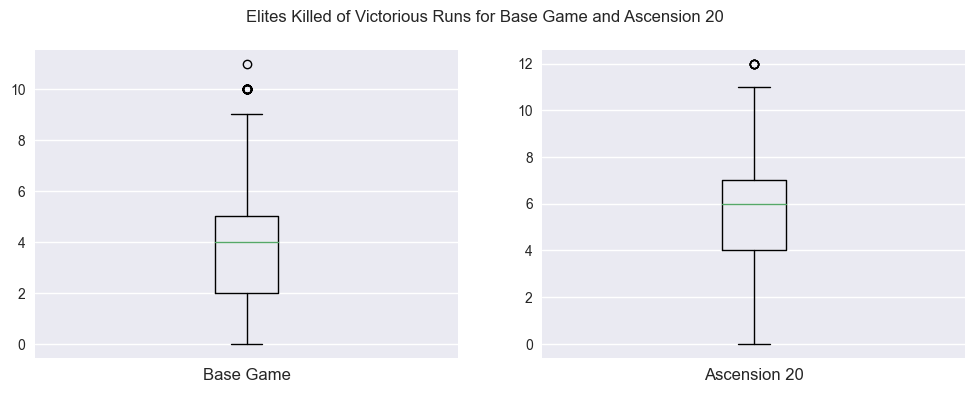

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle("Elites Killed of Victorious Runs for Base Game and Ascension 20")
ax1.boxplot(df.loc[(df["ascension_level"] == 0) & (df["victory"] == True), "elites_killed"])
ax1.get_xaxis().set_visible(False)
ax1.set_title("Base Game", y=-0.1)

ax2.boxplot(df.loc[(df["ascension_level"] == 20) & (df["victory"] == True), "elites_killed"])
ax2.get_xaxis().set_visible(False)
ax2.set_title("Ascension 20", y=-0.1)
plt.show()

Elites are dangerous but rewarding enemies in Slay the Spire. They are capable of quickly ending a mediocre run, or granting more player power in the form of relics, gold, and card rewards. On average, 4 elites are killed during a run of the base game. During <span style="color:#D0221a;">Ascension 20</span> runs, the average raises to 6. Newer players may be frightened by elite enemies whereas <span style="color:#D0221a;">Ascension 20</span> players are more experienced with handling them. In addition, one of the <span style="color:#D0221a;">Ascension</span> modifiers increases the elite spawn rate by 60%, making it possible to fight more elites than during a regular run.

<img src="images/relics/blackstar.png" width="100" align="left" />

Sometimes, the Black Star relic is obtained. This relic makes all elite fights drop two relics instead of a single one. The rewards are high, but so is the risk. Inexperienced players may find themselves back in the starting menu rather quickly if they fall for the bait while unprepared. There are also additional sources of elites such as certain events. For these reasons, the several outlier values exist.

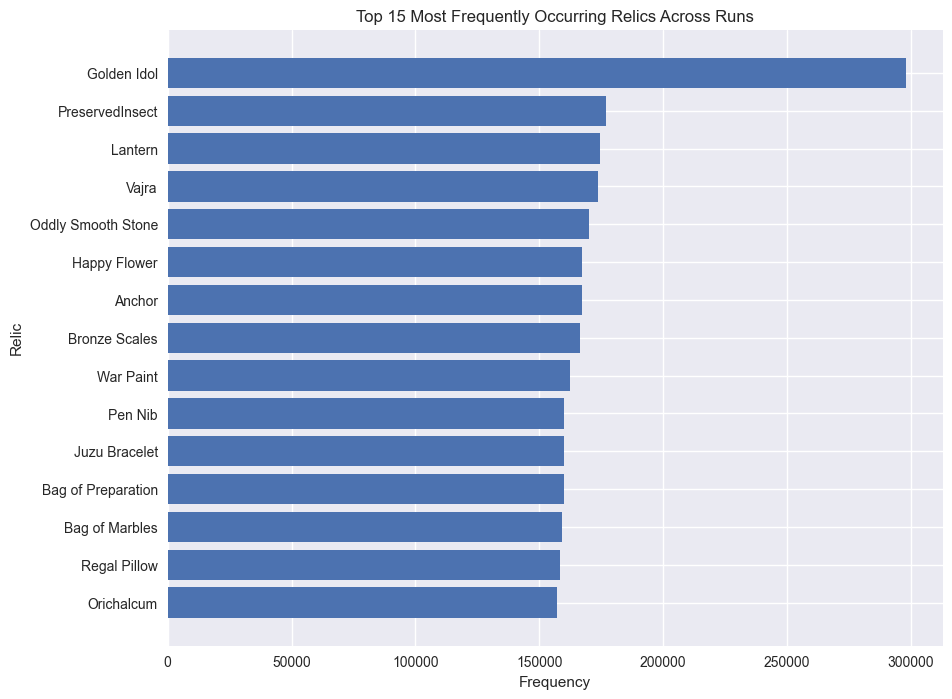

In [155]:
relics_df = pd.DataFrame.from_dict(total_relic_frequency, 
                                   orient="index").sort_values(by="Frequency", ascending=False).reset_index()
relics_df = relics_df[relics_df["index"].isin(["Burning Blood", "Ring of the Snake", "NeowsBlessing", 
                                               "Cracked Core", "PureWater"]) == False]
relics_df.reset_index(inplace=True, drop=True)

plt.figure(figsize=(10,8))
plt.barh(relics_df.loc[:14, "index"], relics_df.loc[:14, "Frequency"])
plt.gca().invert_yaxis()
plt.title("Top 15 Most Frequently Occurring Relics Across Runs")
plt.xlabel("Frequency")
plt.ylabel("Relic")
plt.show()

<img src="images/commonrelics.png" />

Naturally, the common relics are found more frequently. What is interesting is how the Golden Idol relic seems to occur far more often than other relics, despite being a relic only available through a specific event in Act 1. However, the event is very common and players tend to love its type of buff in a game. The relic makes every fight in the game drop 25% more gold. More gold means more shop visits, meaning more cards, meaning more power. Since it can be found in Act 1, it's guaranteed to provide a nice bonus through a large part of the game.

In [157]:
df.loc[df["killed_by"] != "None", "killed_by"].value_counts().tail(10)

Colosseum Nobs            2452
3 Shapes                  2178
Orb Walker                 943
Mind Bloom Boss Battle     366
Slaver and Parasite          7
Flame Bruiser 2 Orb          3
Replay:BlueRogue             1
Flame Bruiser 1 Orb          1
Fading Forest                1
Replay:Snechameleon          1
Name: killed_by, dtype: int64